In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib import cm
from matplotlib.pyplot import figure
import fastf1 as ff1
from fastf1 import plotting
import time
from datetime import datetime, date, time, timedelta
from timple.timedelta import strftimedelta
from fastf1.core import Laps


#enabling the cache for the data

ff1.Cache.enable_cache('f1cache')

#importing the data
race = ff1.get_session(2022, 'Canada', 'Race')
laps= race.load_laps(with_telemetry=True)
results= race.results

new_race= ff1.get_session(2022,'Baki','Race')
new_laps=new_race.load_laps(with_telemetry=True)

c:\Users\bhamm\miniconda3\envs\Python3_9\lib\site-packages\fastf1\core.py:1127: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for Canadian Grand Prix - Race [v2.2.8]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '55', '44', '63', '16', '31', 

In [4]:
laps.head()

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,IsPersonalBest,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
0,0 days 01:03:37.424000,1,NaT,1,1,0 days 00:23:57.599000,NaT,NaT,0 days 00:00:25.320000,0 days 00:00:31.346000,...,False,MEDIUM,1.0,True,0 days 01:02:13.737000,Red Bull Racing,VER,1,False,2022-06-19 18:03:13.750
1,0 days 01:04:56.384000,1,0 days 00:01:18.960000,2,1,NaT,NaT,0 days 00:00:22.137000,0 days 00:00:25.309000,0 days 00:00:31.514000,...,False,MEDIUM,2.0,True,0 days 01:03:37.424000,Red Bull Racing,VER,1,True,2022-06-19 18:04:37.437
2,0 days 01:06:15.202000,1,0 days 00:01:18.818000,3,1,NaT,NaT,0 days 00:00:22.112000,0 days 00:00:25.390000,0 days 00:00:31.316000,...,False,MEDIUM,3.0,True,0 days 01:04:56.384000,Red Bull Racing,VER,1,True,2022-06-19 18:05:56.397
3,0 days 01:07:33.595000,1,0 days 00:01:18.393000,4,1,NaT,NaT,0 days 00:00:21.980000,0 days 00:00:25.135000,0 days 00:00:31.278000,...,False,MEDIUM,4.0,True,0 days 01:06:15.202000,Red Bull Racing,VER,1,True,2022-06-19 18:07:15.215
4,0 days 01:08:51.888000,1,0 days 00:01:18.293000,5,1,NaT,NaT,0 days 00:00:21.830000,0 days 00:00:25.200000,0 days 00:00:31.263000,...,False,MEDIUM,5.0,True,0 days 01:07:33.595000,Red Bull Racing,VER,1,True,2022-06-19 18:08:33.608


In [5]:
laps.describe()

,Time,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,SpeedI2,SpeedFL,SpeedST,TyreLife,LapStartTime
count,1262,1241,1262.000000,1262.000000,51,32,1239,1262,1262,1239,1262,1262,1069.000000,1262.000000,1230.000000,1262.000000,1180.000000,1262
mean,0 days 01:50:01.348438193,0 days 00:01:22.874508460,34.526149,1.980190,0 days 01:12:11.345549019,0 days 01:42:54.197437500,0 days 00:00:23.167456012,0 days 00:00:26.321477812,0 days 00:00:33.377123613,0 days 01:49:44.239389023,0 days 01:49:27.972767828,0 days 01:50:01.349901743,237.802619,265.175119,275.214634,299.947702,15.828814,0 days 01:48:38.358524564
std,0 days 00:28:09.842809478,0 days 00:00:11.138963421,20.289550,0.759035,0 days 00:41:56.805822244,0 days 00:22:21.506828832,0 days 00:00:02.889407587,0 days 00:00:03.392520657,0 days 00:00:05.915371701,0 days 00:27:45.688991782,0 days 00:28:09.506257722,0 days 00:28:09.840939895,28.741964,31.506432,27.186685,44.768189,11.592948,0 days 00:28:09.876243437
min,0 days 01:03:37.424000,0 days 00:01:15.749000,1.000000,1.000000,0 days 00:23:46.375000,0 days 01:09:02.435000,0 days 00:00:21.061000,0 days 00:00:24.087000,0 days 00:00:30.288000,0 days 01:03:59.561000,0 days 01:03:06.137000,0 days 01:03:37.509000,49.000000,70.000000,85.000000,75.000000,1.000000,0 days 01:02:13.737000
25%,0 days 01:25:37.766000,0 days 00:01:18.148000,17.000000,1.000000,0 days 00:25:22.570000,0 days 01:27:49.952250,0 days 00:00:21.934000,0 days 00:00:24.971500,0 days 00:00:31.203250,0 days 01:25:31.191500,0 days 01:25:06.584500,0 days 01:25:37.766000,242.000000,271.000000,278.000000,305.000000,7.000000,0 days 01:24:19.526250
50%,0 days 01:48:57.639000,0 days 00:01:19.070000,34.000000,2.000000,0 days 01:15:13.847000,0 days 01:46:01.774000,0 days 00:00:22.289000,0 days 00:00:25.272500,0 days 00:00:31.460500,0 days 01:48:44.350000,0 days 01:48:26.149000,0 days 01:48:57.639000,248.000000,274.000000,281.000000,310.000000,14.000000,0 days 01:47:38.542000
75%,0 days 02:14:10.602750,0 days 00:01:19.919000,52.000000,3.000000,0 days 01:56:01.800500,0 days 02:05:57.323750,0 days 00:00:22.648500,0 days 00:00:25.544000,0 days 00:00:31.749000,0 days 02:14:24.784500,0 days 02:13:25.933000,0 days 02:14:10.602750,251.000000,277.000000,285.000000,318.000000,22.000000,0 days 02:12:31.532750
max,0 days 02:39:43.948000,0 days 00:02:20.984000,70.000000,3.000000,0 days 02:09:34.137000,0 days 02:09:09.281000,0 days 00:00:36.570000,0 days 00:00:42.374000,0 days 00:01:14.928000,0 days 02:38:46.242000,0 days 02:39:11.950000,0 days 02:39:43.948000,261.000000,288.000000,300.000000,342.000000,63.000000,0 days 02:38:23.431000


In [6]:
#picking the laps for each driver

ver = laps.pick_driver('VER')
ham = laps.pick_driver('HAM')
gas = laps.pick_driver('GAS')
lec = laps.pick_driver('LEC')
alo = laps.pick_driver('ALO')
sai = laps.pick_driver('SAI')
oco = laps.pick_driver('OCO')
nor = laps.pick_driver('NOR')
vet = laps.pick_driver('VET')
zho = laps.pick_driver('ZHO')
rus = laps.pick_driver('RUS')
gio = laps.pick_driver('GIO')
tsu = laps.pick_driver('TSU')
lat = laps.pick_driver('LAT')
mag = laps.pick_driver('MAG')
msc = laps.pick_driver('MSC')
ric = laps.pick_driver('RIC')
sto = laps.pick_driver('STR')
bot = laps.pick_driver('BOT')
per = laps.pick_driver('PER')
alb = laps.pick_driver('ALB')

## Cleaning Up Data by removing laps with no lap times and removing lap times above the mean of the race

In [23]:
#turn LapTime into seconds from DD:HH:MM:SS
laps['LapTime_seconds'] = laps['LapTime'].dt.total_seconds()

#drop all rows with NaN in LapTime_seconds
laps = laps.dropna(subset=['LapTime_seconds'])

laptimemean=laps['LapTime_seconds'].mean()
laptimestd=laps['LapTime_seconds'].std()

#drop all rows in laps with LapTime_seconds 3 std greater than the mean lap time
laps = laps[laps['LapTime_seconds'] < (laptimemean + 3*laptimestd)]
laps['LapTime_seconds'].idxmax()

#after running to 915 as the output the data is correct

#turn LapTime into seconds from DD:HH:MM:SS
new_laps['LapTime_seconds'] = new_laps['LapTime'].dt.total_seconds()

#drop all rows with NaN in LapTime_seconds
new_laps = new_laps.dropna(subset=['LapTime_seconds'])

laptimemean=new_laps['LapTime_seconds'].mean()
laptimestd=new_laps['LapTime_seconds'].std()

#drop all rows in laps with LapTime_seconds 3 std greater than the mean lap time
new_laps = new_laps[new_laps['LapTime_seconds'] < (laptimemean + 3*laptimestd)]
laps['LapTime_seconds'].idxmax()

915

## Visualization Showing Lap Times Between Hamilton and Verstappen

c:\Users\bhamm\miniconda3\envs\Python3_9\lib\site-packages\fastf1\core.py:931: FutureWarning: The property `Session.weekend` has been renamed to `Session.event`.
 The old property will be removed ina future version.
  warnings.warn("The property `Session.weekend` has been renamed to "
c:\Users\bhamm\miniconda3\envs\Python3_9\lib\site-packages\fastf1\events.py:650: FutureWarning: The `Weekend.name` property is deprecated and will beremoved in a future version.
Use `Event['EventName']` or `Event.EventName` instead.
  warnings.warn(


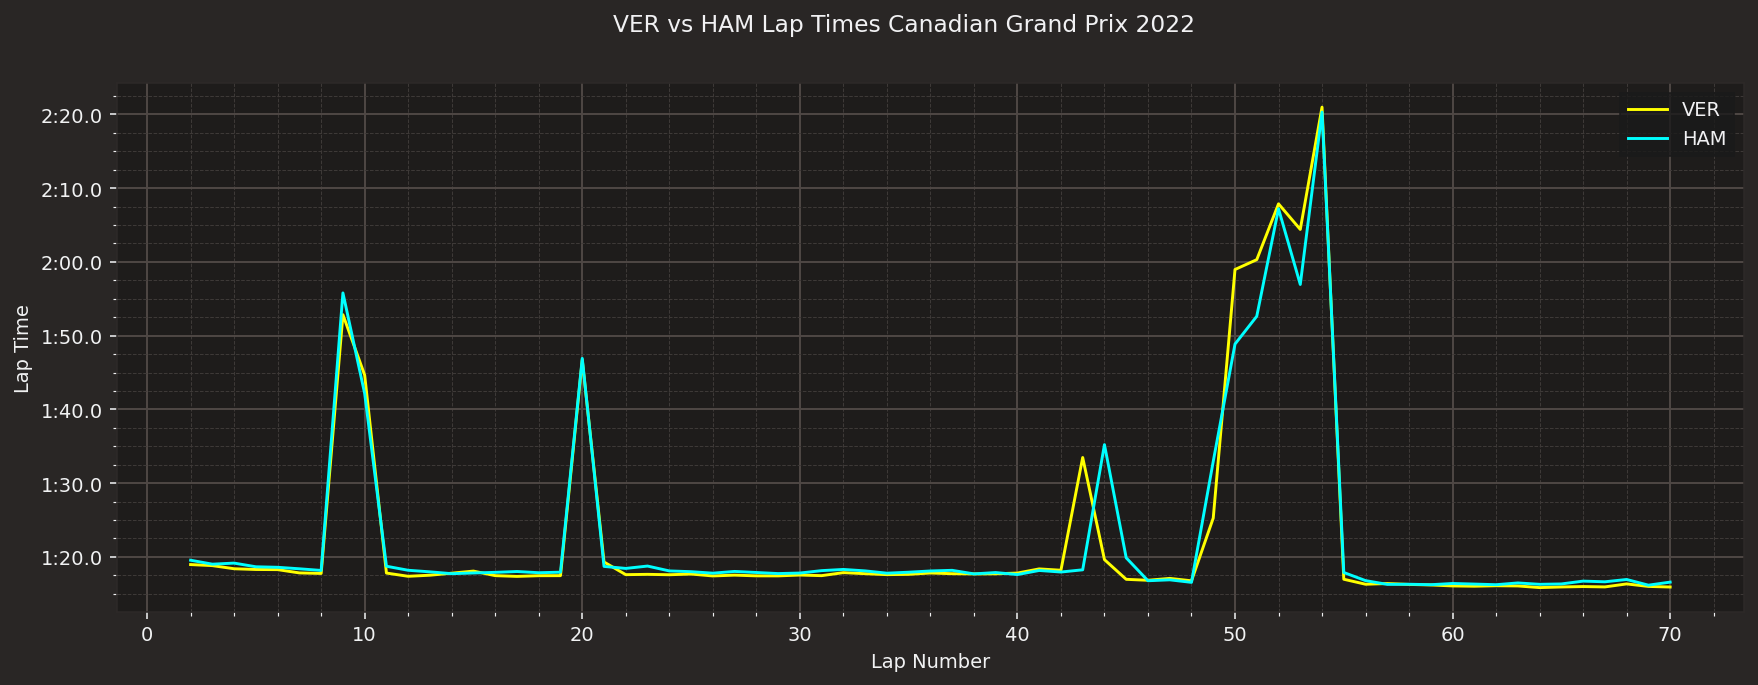

In [15]:
#setting parameters for the plots
plt.rcParams["figure.figsize"] = (15,5)
plt.rcParams['figure.dpi'] = 140

#plotting the data
plotting.setup_mpl()
fig, ax = plt.subplots()
ax.plot(ver['LapNumber'], ver['LapTime'], color='yellow',label='VER')
ax.plot(ham['LapNumber'], ham['LapTime'], color='cyan',label='HAM')
plt.suptitle(f"VER vs HAM Lap Times {race.weekend.name} {race.weekend.year}")
ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time")
plt.legend(loc='upper right')
plt.show()

## Doing Some Data Analysis

In [16]:
results.head()

,DriverNumber,BroadcastName,Abbreviation,TeamName,TeamColor,FirstName,LastName,FullName,Position,GridPosition,Q1,Q2,Q3,Time,Status,Points
1,1,M VERSTAPPEN,VER,Red Bull Racing,1e5bc6,Max,Verstappen,Max Verstappen,1.0,1.0,NaT,NaT,NaT,0 days 01:36:21.757000,Finished,25.0
55,55,C SAINZ,SAI,Ferrari,ed1c24,Carlos,Sainz,Carlos Sainz,2.0,3.0,NaT,NaT,NaT,0 days 01:36:22.750000,Finished,19.0
44,44,L HAMILTON,HAM,Mercedes,6cd3bf,Lewis,Hamilton,Lewis Hamilton,3.0,4.0,NaT,NaT,NaT,0 days 01:36:28.763000,Finished,15.0
63,63,G RUSSELL,RUS,Mercedes,6cd3bf,George,Russell,George Russell,4.0,8.0,NaT,NaT,NaT,0 days 01:36:34.070000,Finished,12.0
16,16,C LECLERC,LEC,Ferrari,ed1c24,Charles,Leclerc,Charles Leclerc,5.0,19.0,NaT,NaT,NaT,0 days 01:36:36.925000,Finished,10.0


## Pie plot showing # of gears shifted between Verstappen and Sainz

C:\Users\bhamm\AppData\Local\Temp\ipykernel_18736\1297381137.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry= fastest_ver.append(fastest_sai)
c:\Users\bhamm\miniconda3\envs\Python3_9\lib\site-packages\fastf1\core.py:931: FutureWarning: The property `Session.weekend` has been renamed to `Session.event`.
 The old property will be removed ina future version.
  warnings.warn("The property `Session.weekend` has been renamed to "
c:\Users\bhamm\miniconda3\envs\Python3_9\lib\site-packages\fastf1\events.py:650: FutureWarning: The `Weekend.name` property is deprecated and will beremoved in a future version.
Use `Event['EventName']` or `Event.EventName` instead.
  warnings.warn(


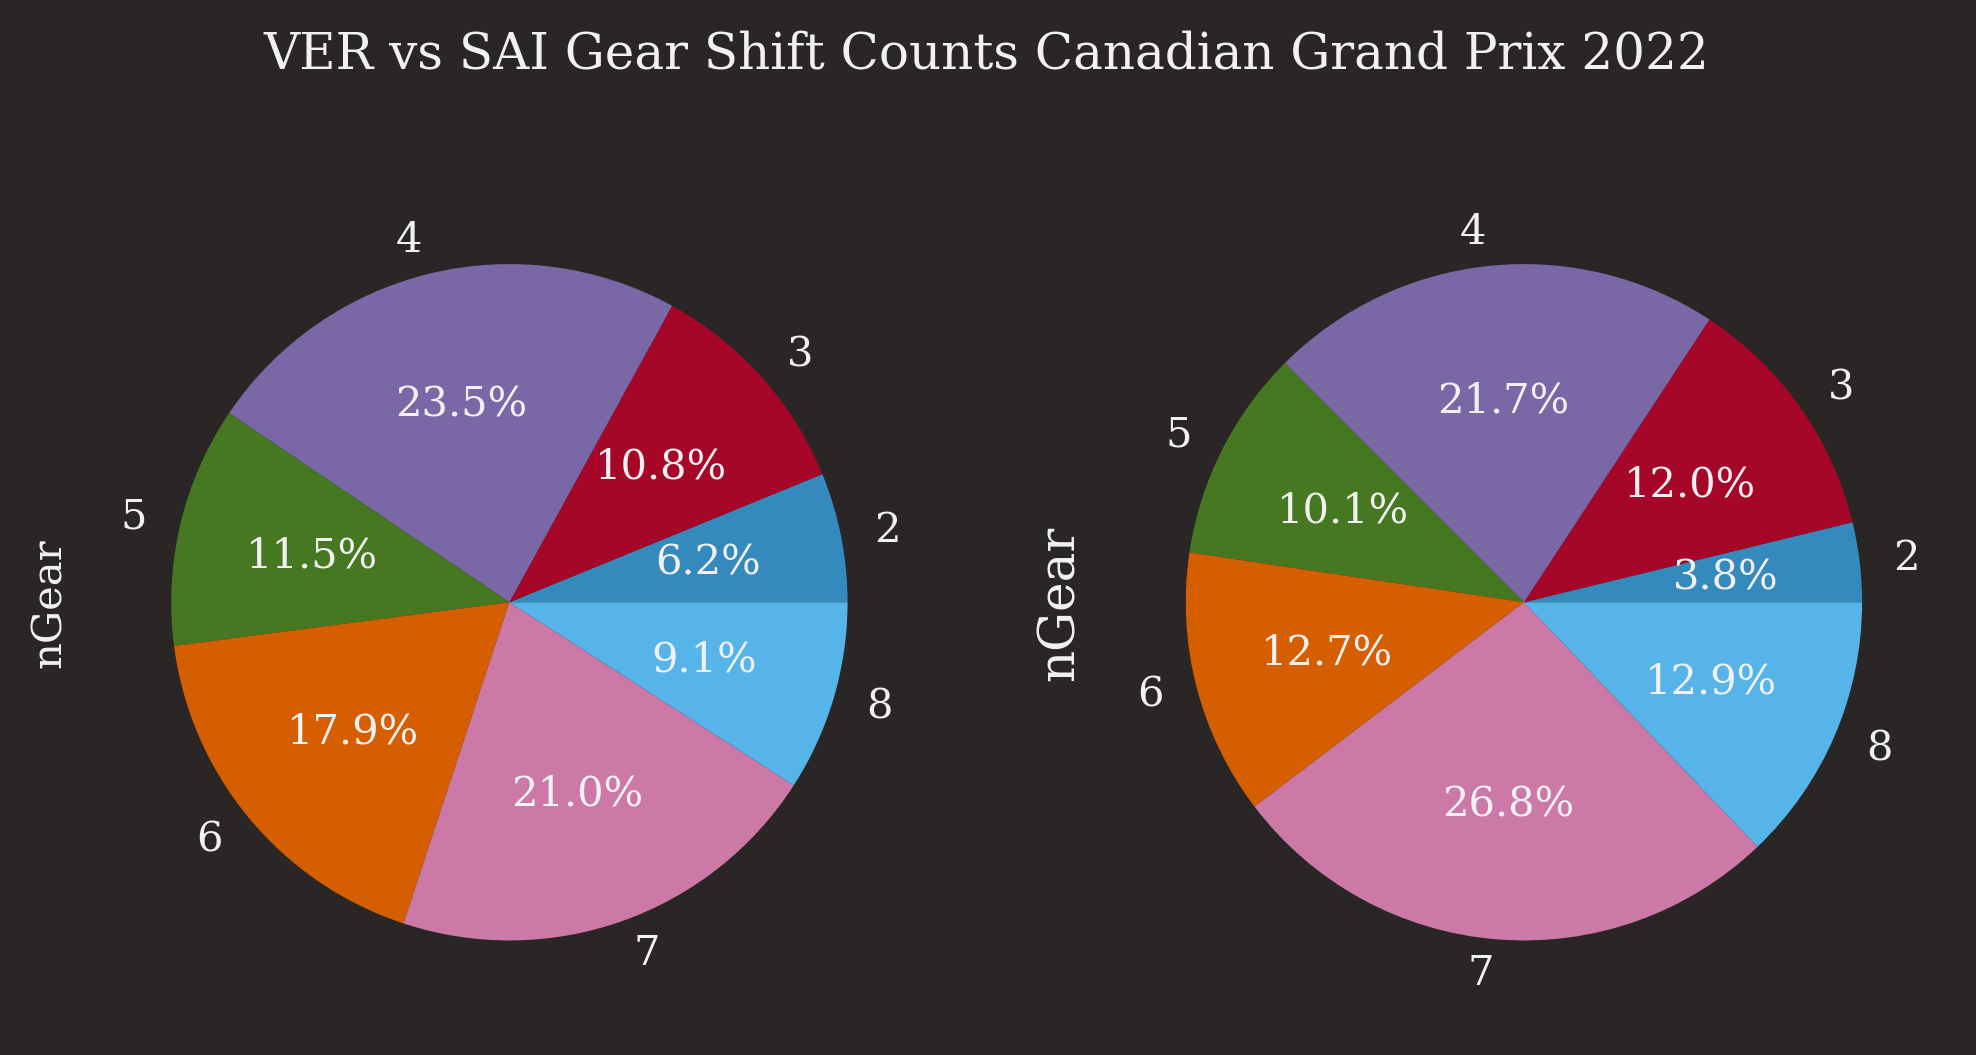

In [17]:
plt.rcParams['figure.figsize'] = [8,4]
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.family'] = 'serif'

#picking fastest laps of wanted drivers

fastest_ver = ver.pick_fastest().get_telemetry().add_distance()
fastest_sai = sai.pick_fastest().get_telemetry().add_distance()

#creating column in the telemetry dataframe to indicate drivers
fastest_ver['Driver'] = 'VER'
fastest_sai['Driver'] = 'SAI'

#merging lap telemtry dataframes together
telemetry= fastest_ver.append(fastest_sai)

#making a pie plot to show the number of times nGear is used for each driver
plt.subplot(1,2,1)
plt.style.use('bmh')
fastest_ver['nGear'].value_counts().sort_index().plot(kind='pie', autopct='%1.1f%%')

#making the same pie plot for SAI
plt.subplot(1,2,2)
plt.style.use('bmh')
fastest_sai['nGear'].value_counts().sort_index().plot(kind='pie', autopct='%1.1f%%')
plt.suptitle(f"VER vs SAI Gear Shift Counts {race.weekend.name} {race.weekend.year}")

#saving image into the f1plots folder
plt.savefig(f'f1plots\VER vs SAI Gear Shift Counts {race.weekend.name} {race.weekend.year}.png',)
plt.show()

c:\Users\bhamm\miniconda3\envs\Python3_9\lib\site-packages\fastf1\core.py:931: FutureWarning: The property `Session.weekend` has been renamed to `Session.event`.
 The old property will be removed ina future version.
  warnings.warn("The property `Session.weekend` has been renamed to "
c:\Users\bhamm\miniconda3\envs\Python3_9\lib\site-packages\fastf1\events.py:650: FutureWarning: The `Weekend.name` property is deprecated and will beremoved in a future version.
Use `Event['EventName']` or `Event.EventName` instead.
  warnings.warn(


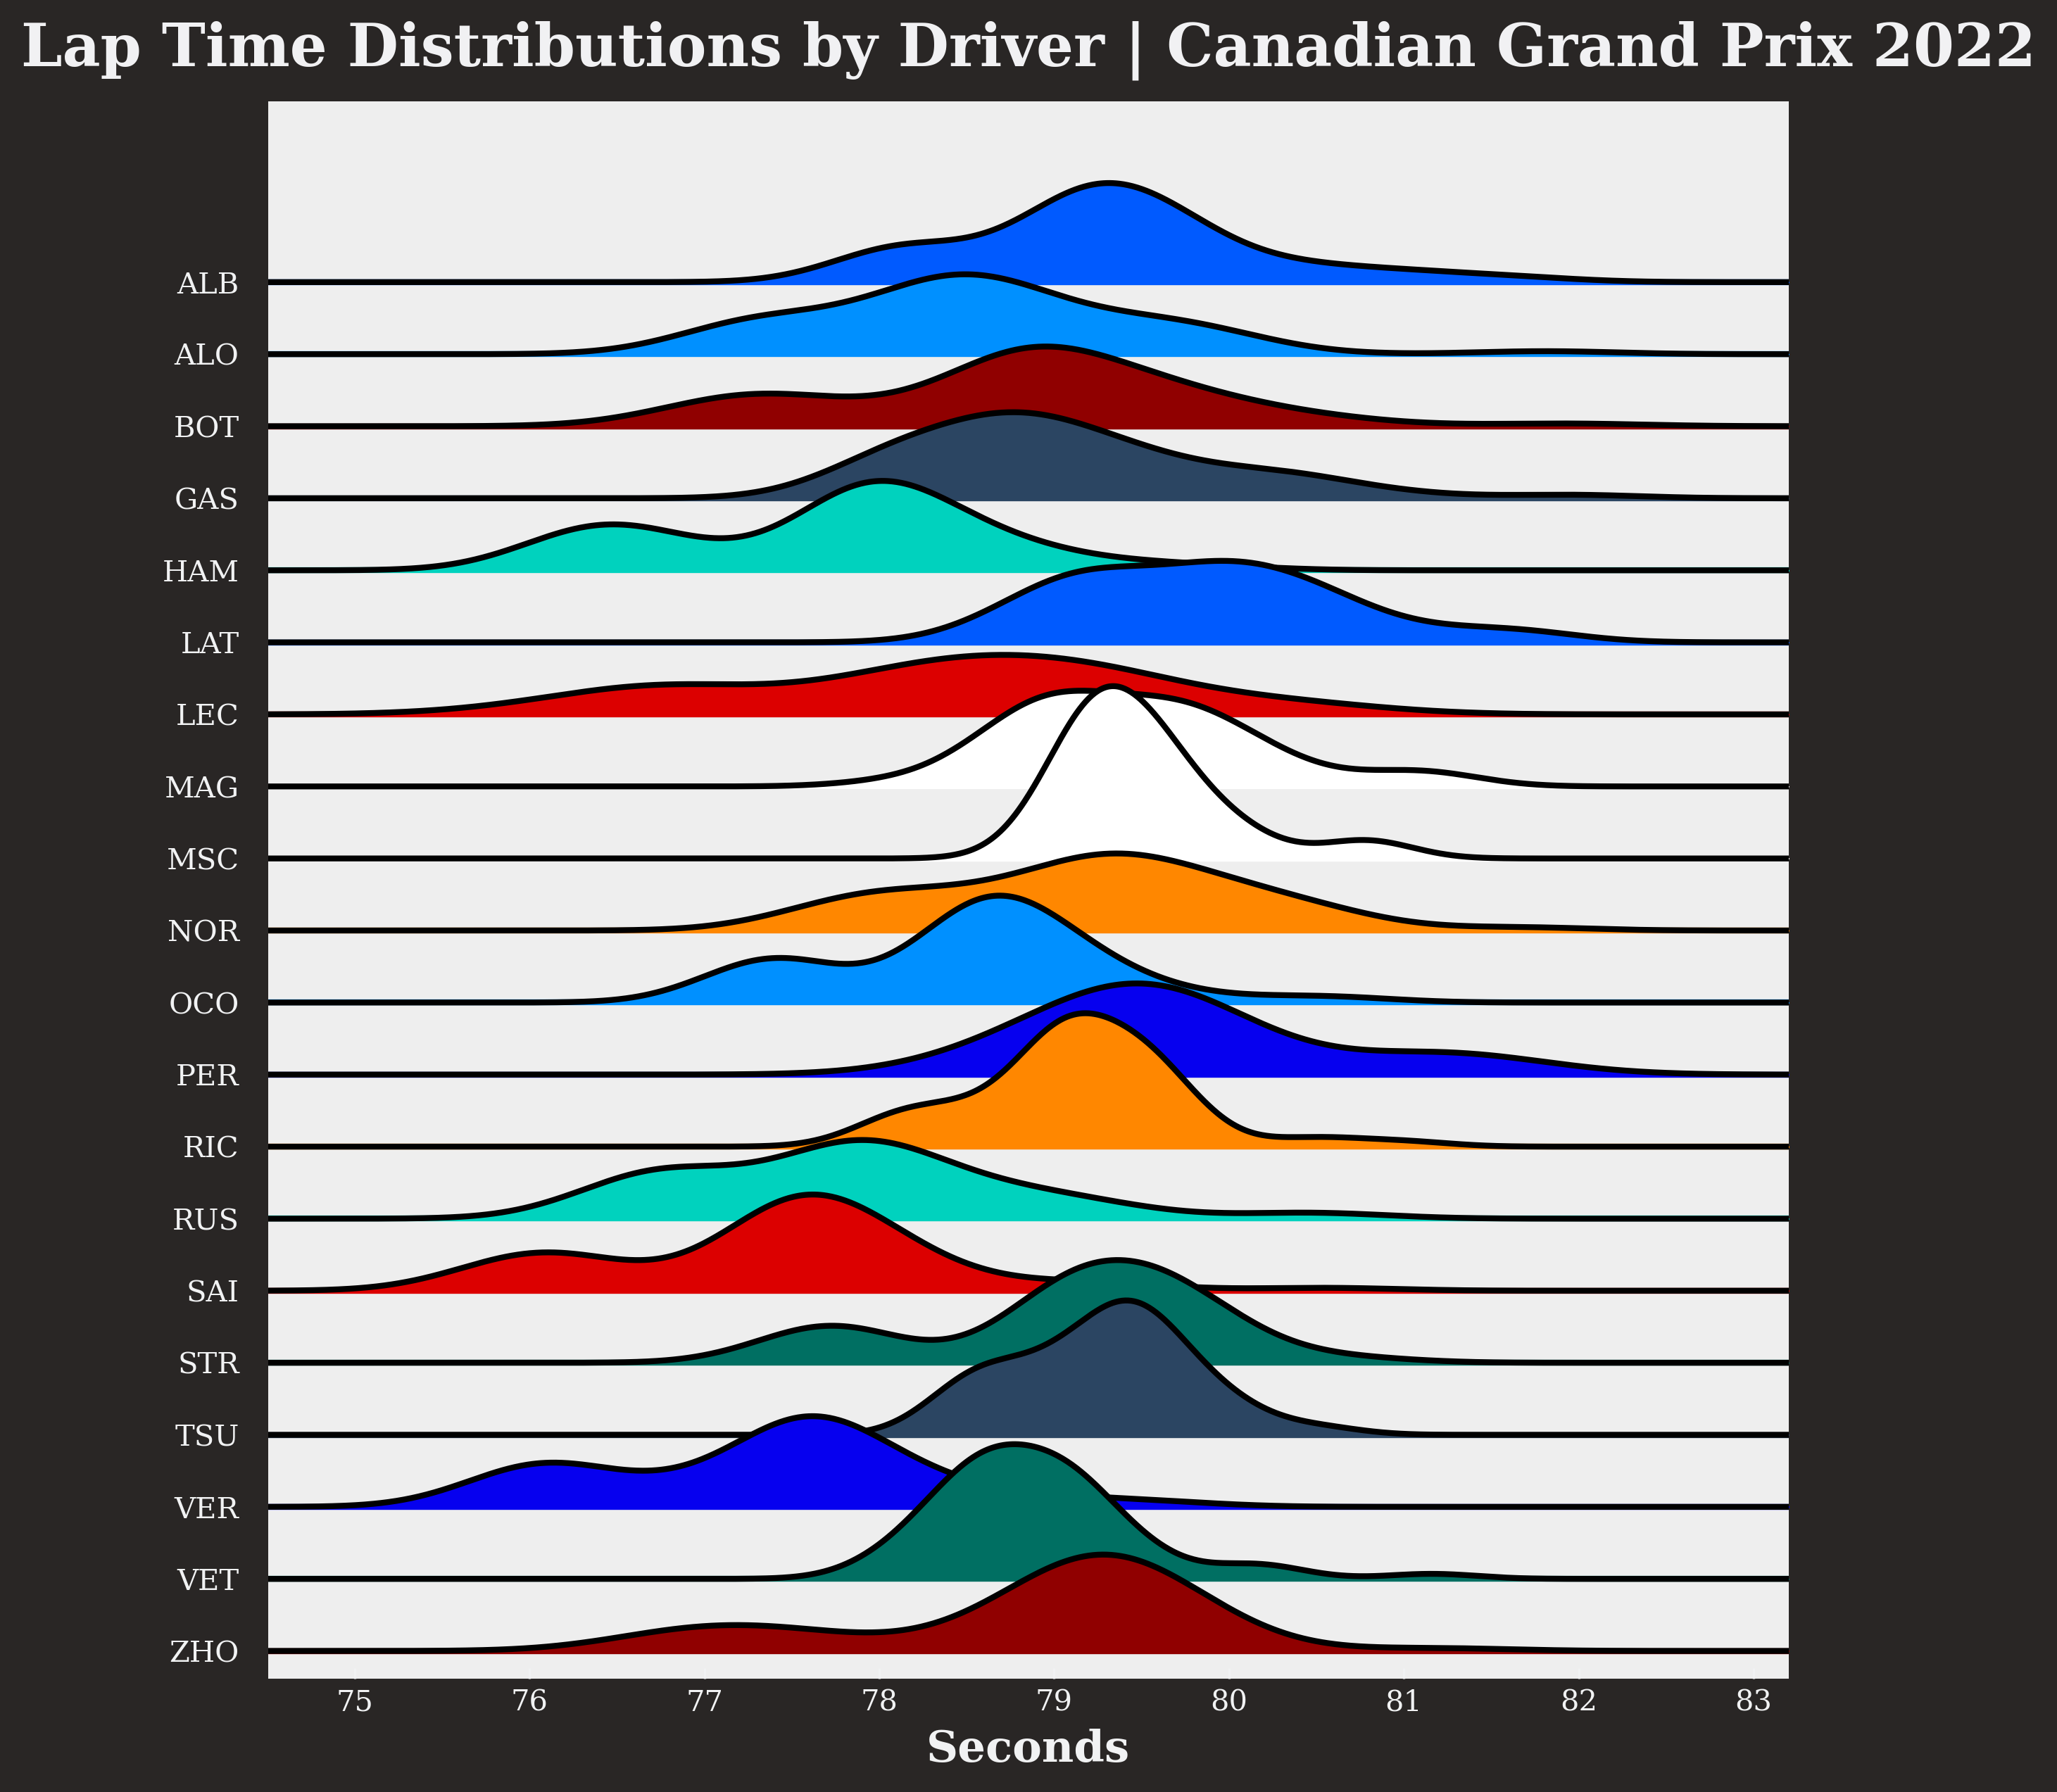

In [18]:
#ridgeline plot showing the relationship between the lap time and the compound
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize']= [8,8]
plt.rcParams['font.family'] = 'serif'

from joypy import joyplot
joyplot(laps, by='Driver', column='LapTime_seconds', color=['#005aff','#0090ff','#900000','#2b4562','#00d2be','#005aff','#dc0000','#ffffff','#ffffff','#ff8700',
'#0090ff','#0600ef','#ff8700','#00d2be','#dc0000','#006f62','#2b4562','#0600ef','#006f62','#900000'])
plt.title(f'Lap Time Distributions by Driver | {race.weekend.name} {race.weekend.year}', fontsize=20, fontweight='bold')
plt.xlabel('Seconds', fontsize=15, fontweight='bold')
plt.savefig(f'f1plots\Lap Time Distributions by Driver {race.weekend.name} {race.weekend.year}.png',bbox_inches='tight')
plt.show()

c:\Users\bhamm\miniconda3\envs\Python3_9\lib\site-packages\fastf1\core.py:931: FutureWarning: The property `Session.weekend` has been renamed to `Session.event`.
 The old property will be removed ina future version.
  warnings.warn("The property `Session.weekend` has been renamed to "
c:\Users\bhamm\miniconda3\envs\Python3_9\lib\site-packages\fastf1\events.py:650: FutureWarning: The `Weekend.name` property is deprecated and will beremoved in a future version.
Use `Event['EventName']` or `Event.EventName` instead.
  warnings.warn(


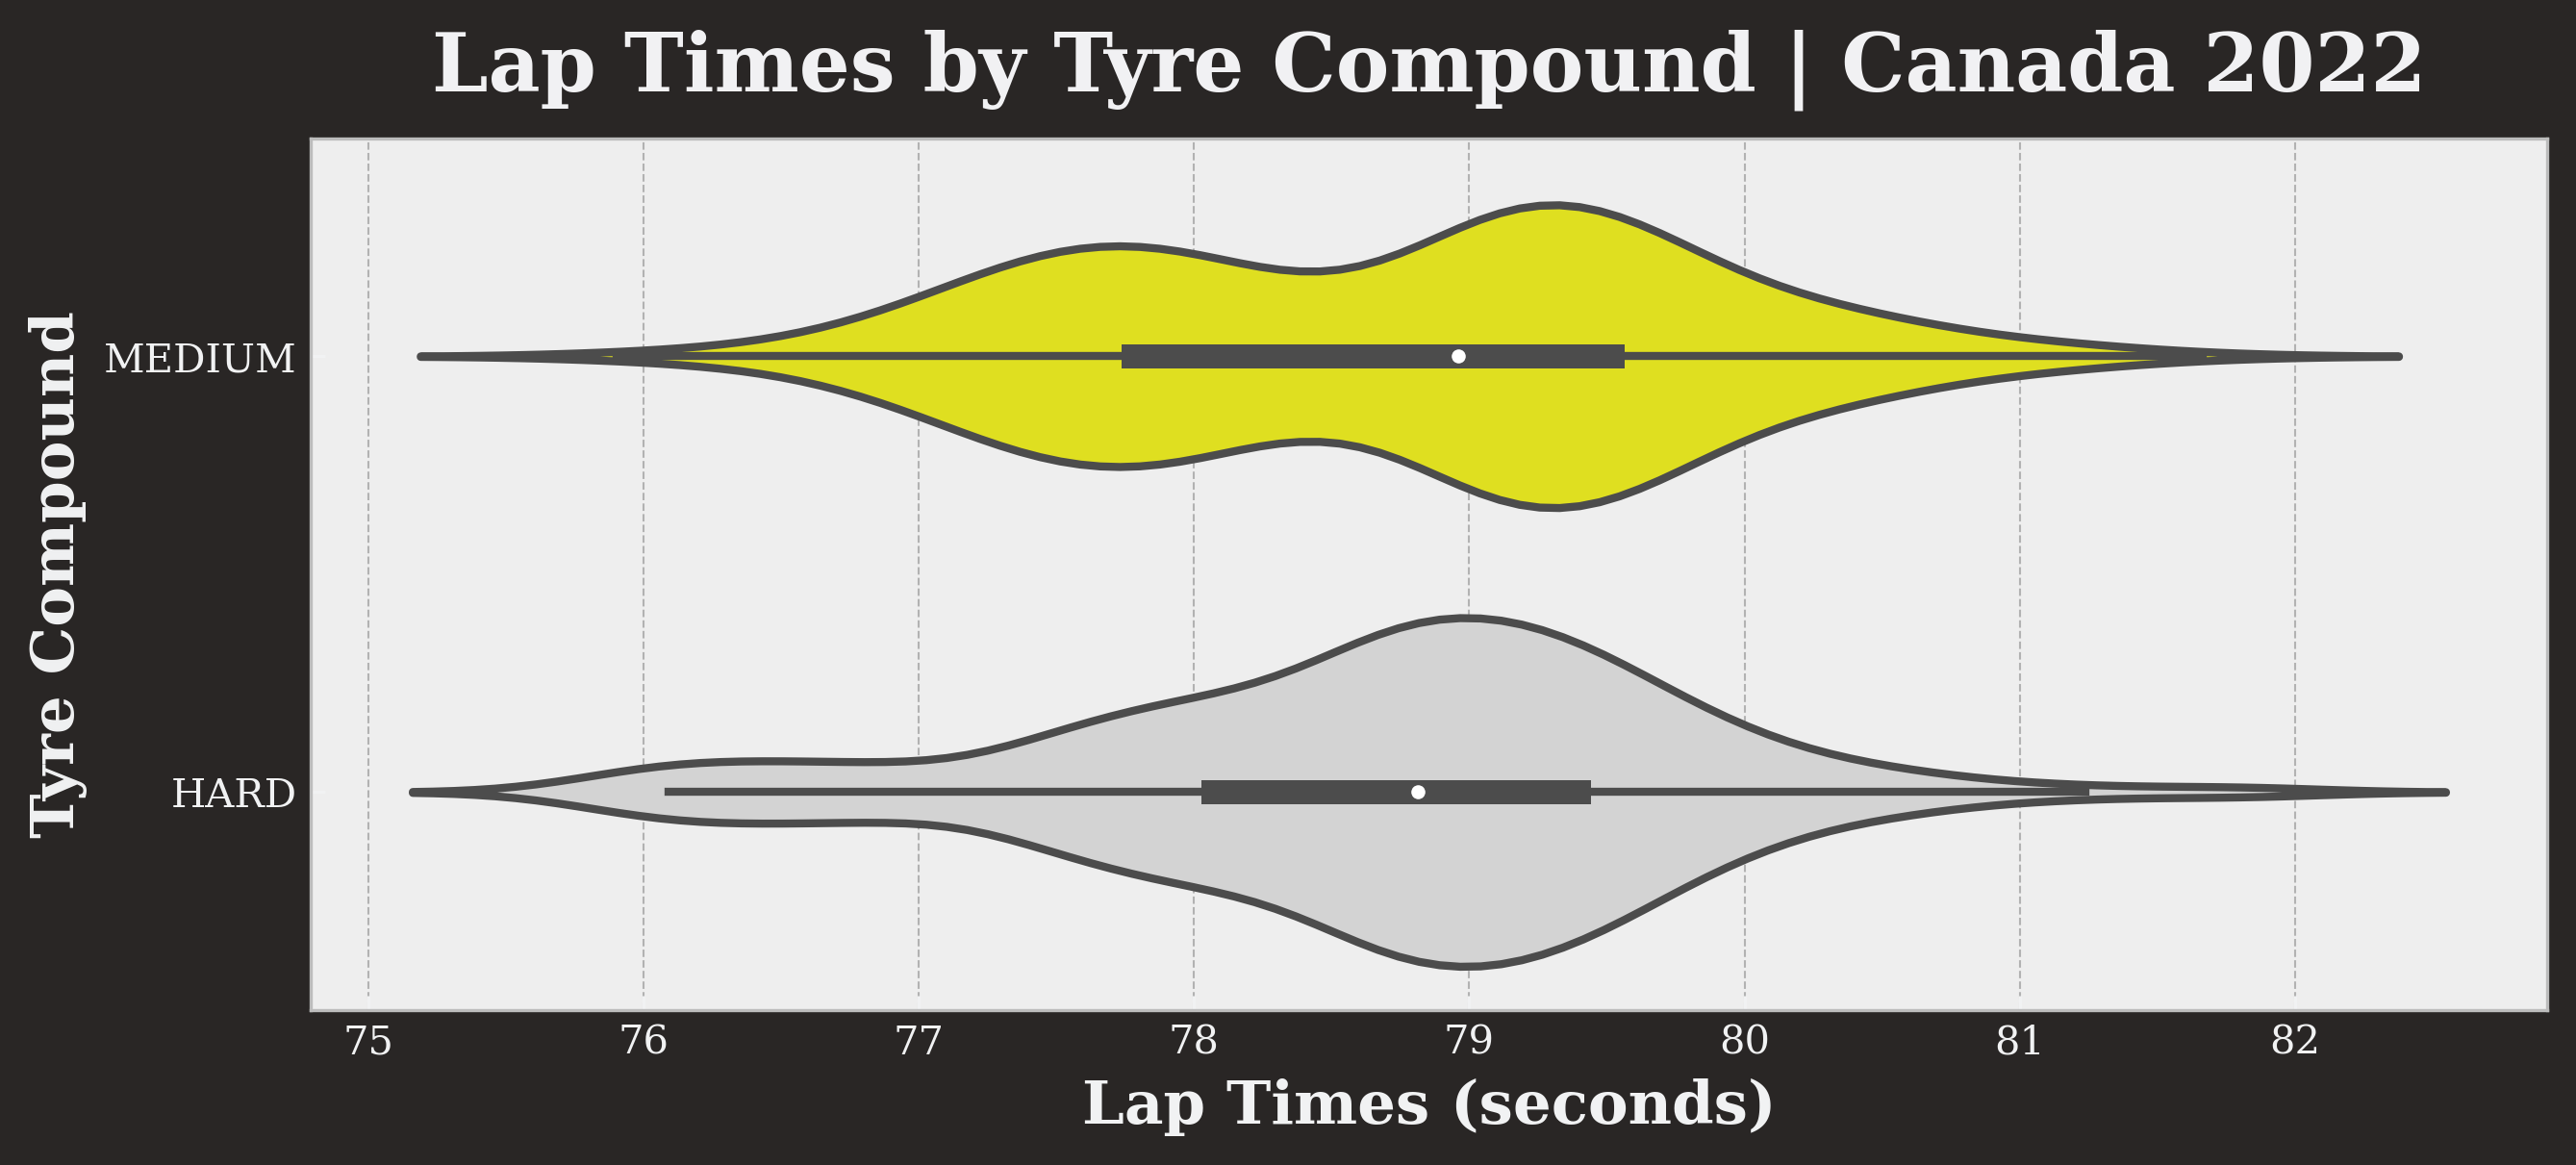

In [19]:
#violin plot showing the relationship between the lap time and the compound
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize']= [10,4]
plt.rcParams['font.family'] = 'serif'

my_pal = {Compound: "yellow" if Compound == "MEDIUM" else "lightgrey" for Compound in laps["Compound"].unique()}

sns.violinplot(x='LapTime_seconds', y='Compound', data=laps, palette= my_pal)
plt.title('Lap Times by Tyre Compound | Canada 2022', fontsize=20, fontweight='bold')
plt.xlabel('Lap Times (seconds)', fontsize=15, fontweight='bold')
plt.ylabel('Tyre Compound', fontsize=15, fontweight='bold')
plt.savefig(f'f1plots\Lap Times by Compound {race.weekend.name} {race.weekend.year}.png',)
plt.show()

In [28]:
#create an xgboost model that predicts the fastest lap of the race
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error


#select all numerical columns from laps
cols=['SpeedST','TyreLife','SpeedI1','SpeedI2','LapNumber','SpeedFL','Stint','IsPersonalBest']

X=laps[cols]

#select target
y=laps.LapTime_seconds

#separate into training and testing sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)

#define the model
fl_model= XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)

#fit the model
fl_model.fit(X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_valid, y_valid)], 
             verbose=False)

#make predictions
predictions=fl_model.predict(X_valid)

#print the MAE
print(mean_absolute_error(y_valid, predictions))

#predict the fastest lap
predictions=fl_model.predict(X)

#print the fastest lap
print(predictions.min())

#compare the predicted fastest lap to the actual fastest lap
print(y.min())

#predict the fastest lap of new_laps
fl_model.predict(new_laps[cols]).min()

0.48997808251014197
76.15178
75.74900000000001


c:\Users\bhamm\miniconda3\envs\Python3_9\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


79.26724

<AxesSubplot:>

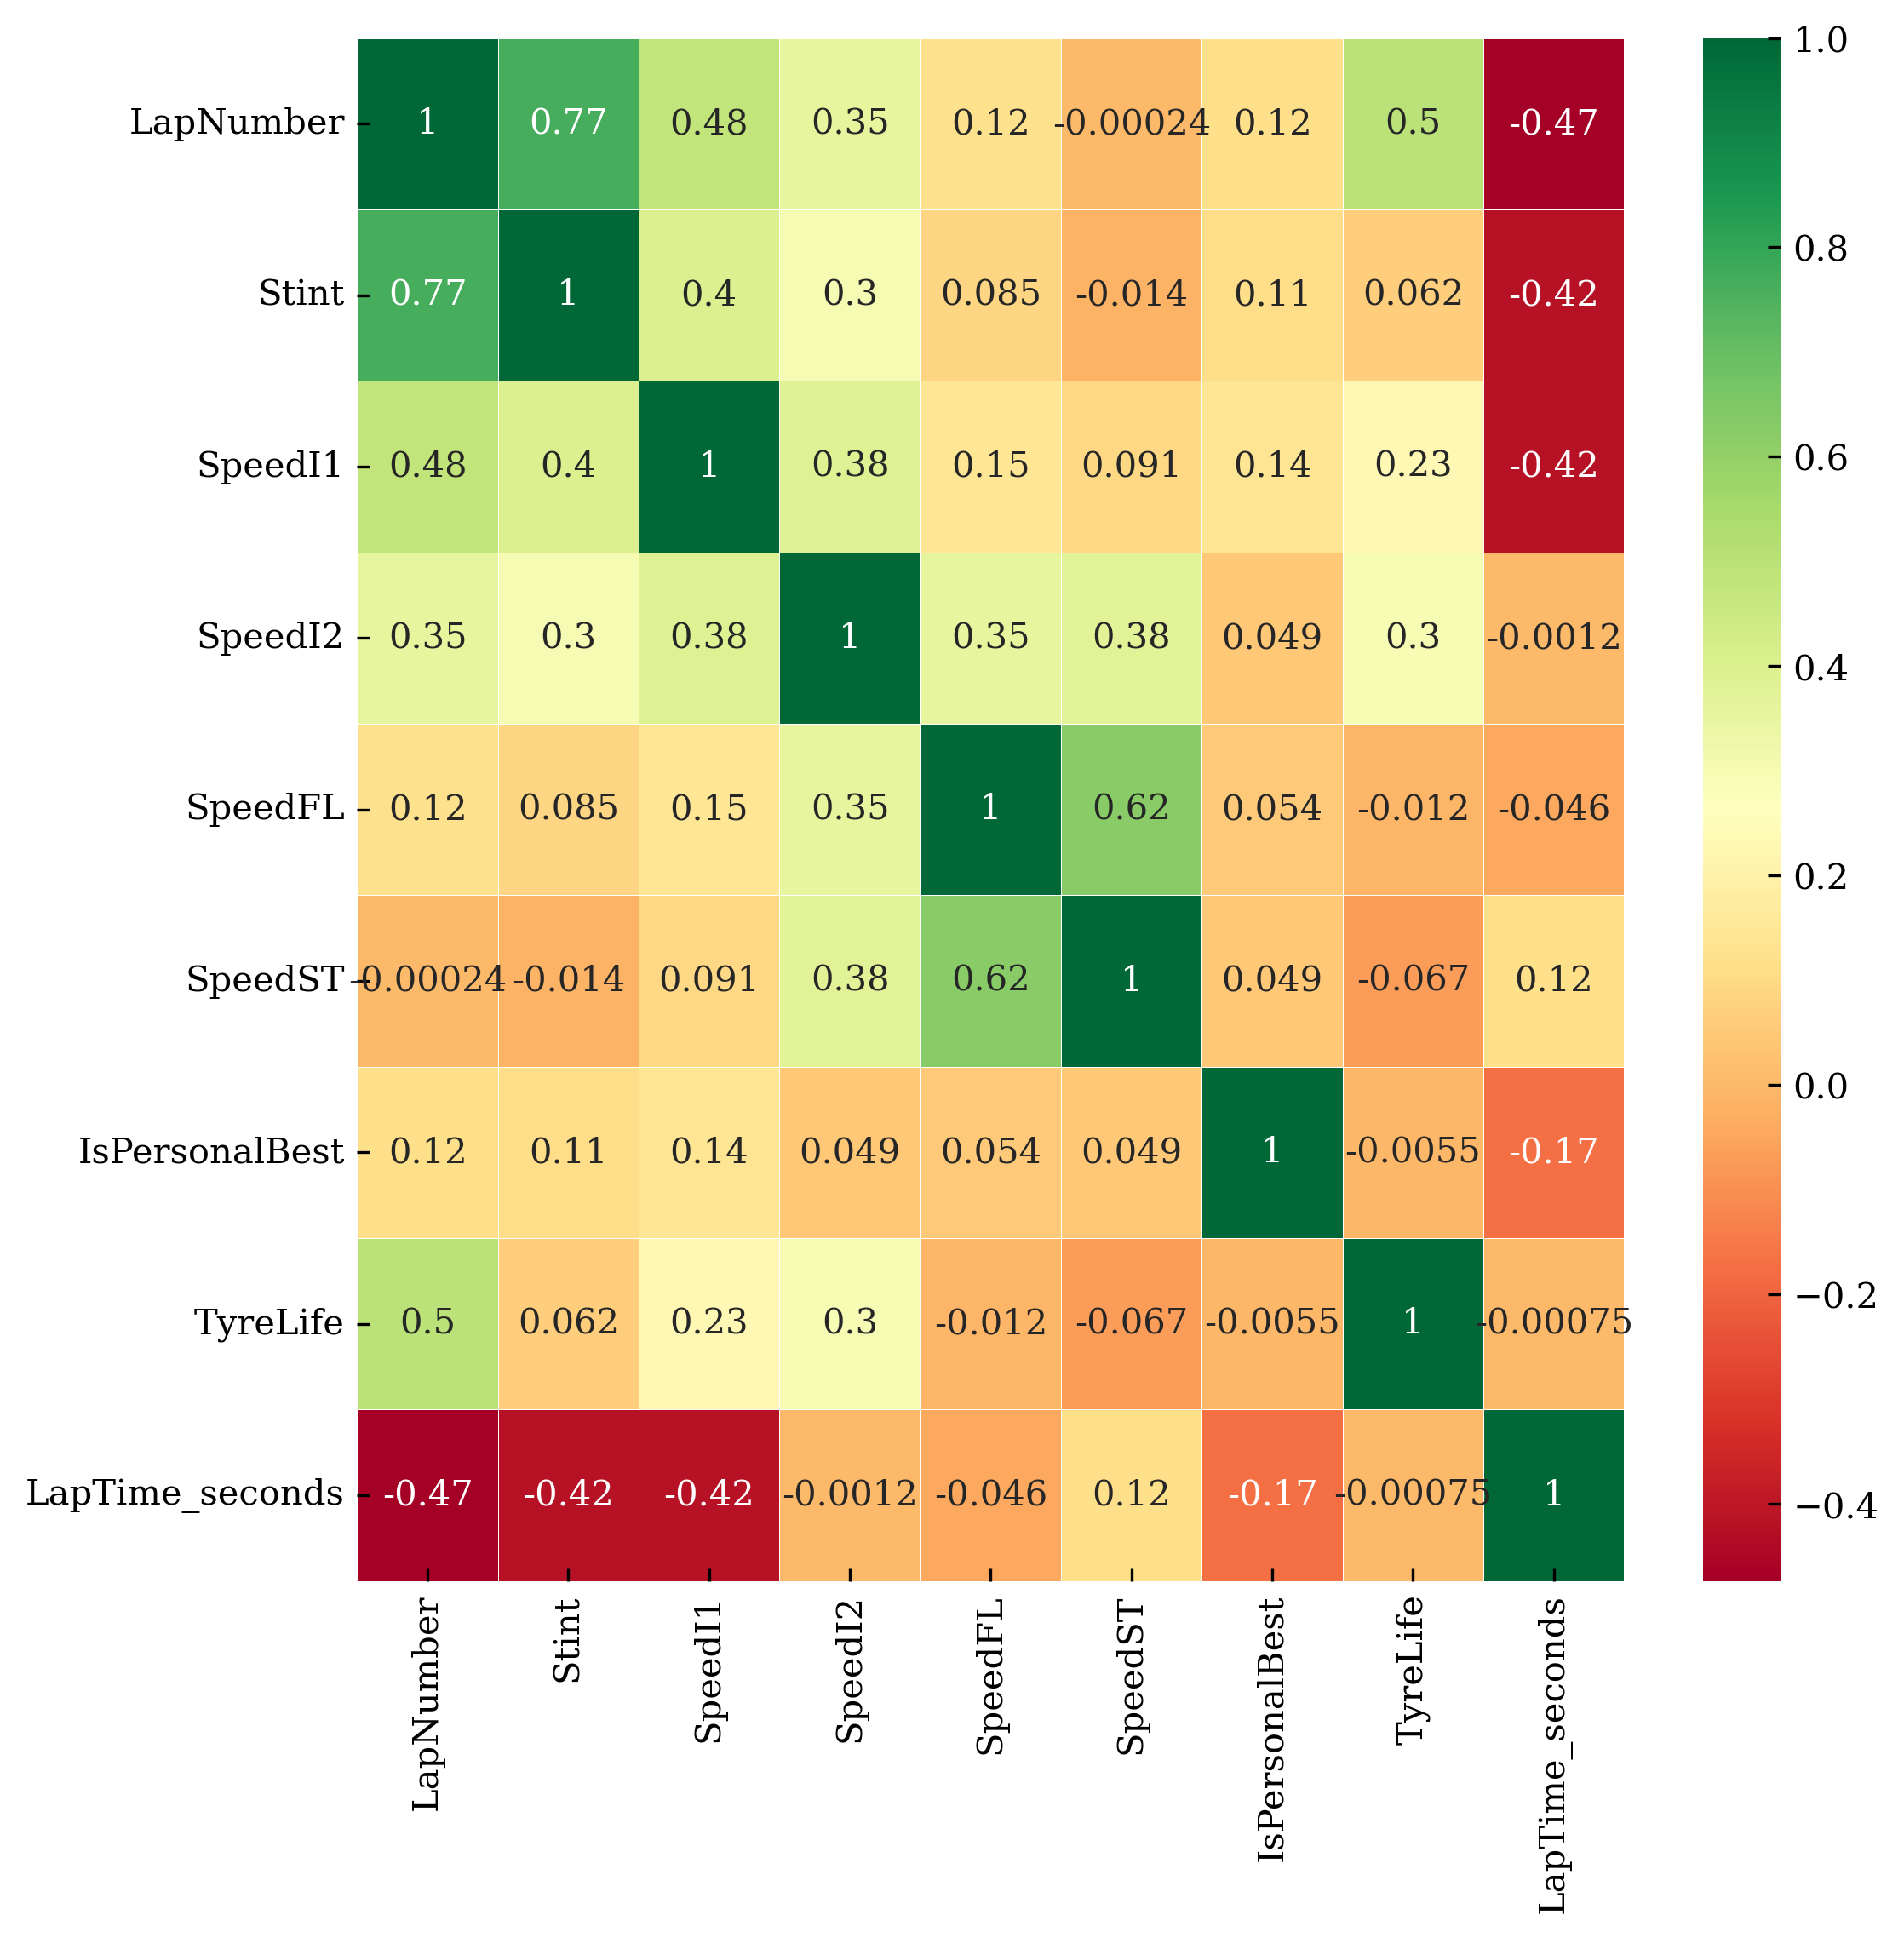

In [53]:
sns.heatmap(laps.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)